In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\sreel\\OneDrive\\Desktop\\MSc DataScience\\Data sets\\IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Analysis

## Checking the details of Rows Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking the Null Values

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Univariate Analysis

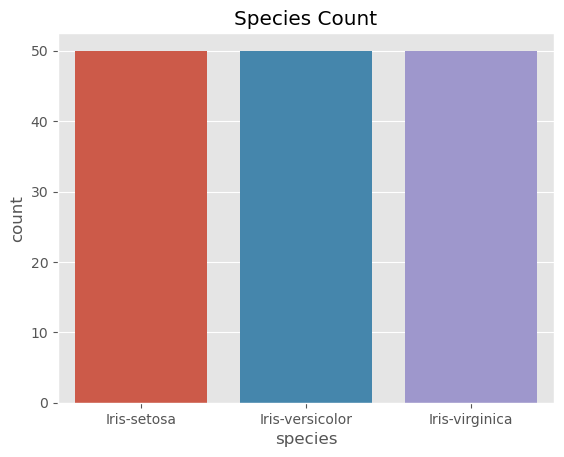

In [8]:
sns.countplot(x = df['species'], data = df)
plt.title('Species Count')
plt.show()

From the above plot and count, we can see the data is balanced

Text(0, 0.5, 'Count')

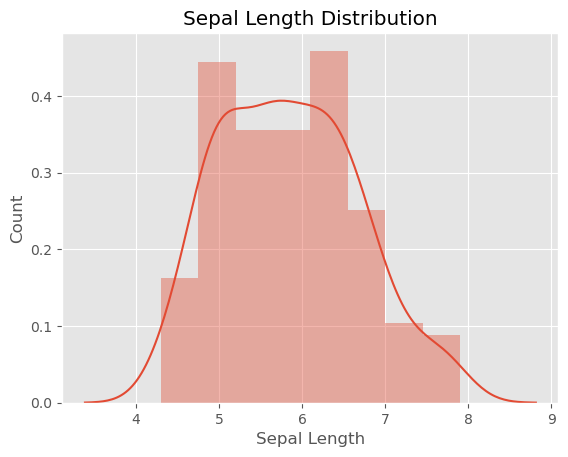

In [9]:
sns.distplot(df['sepal_length'])
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

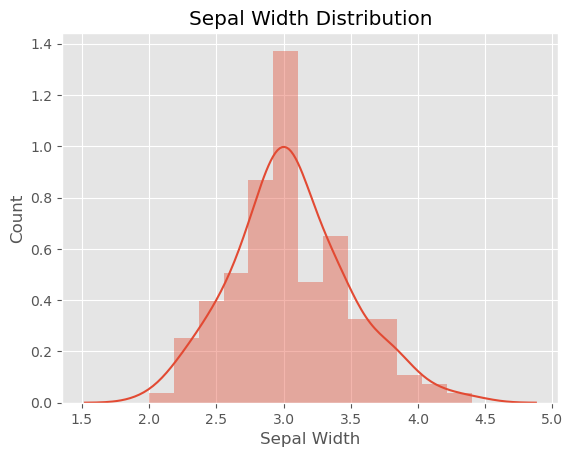

In [10]:
sns.distplot(df['sepal_width'])
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal Width')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

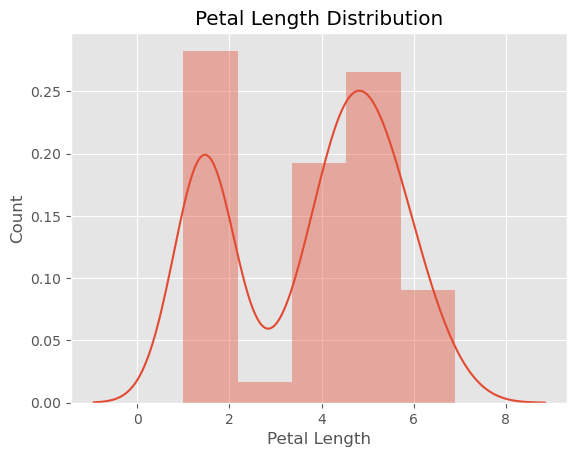

In [11]:
sns.distplot(df['petal_length'])
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

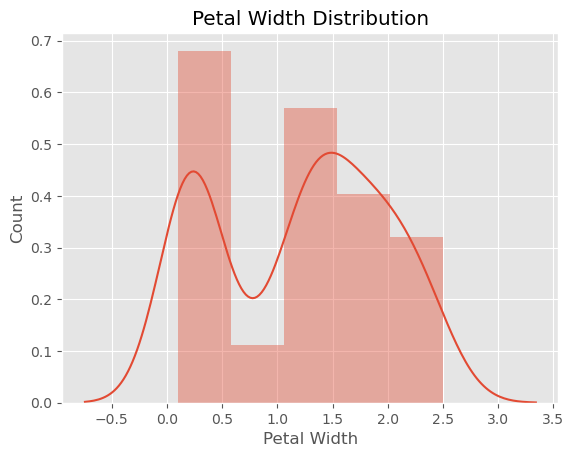

In [12]:
sns.distplot(df['petal_width'])
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width')
plt.ylabel('Count')

<Axes: xlabel='sepal_length'>

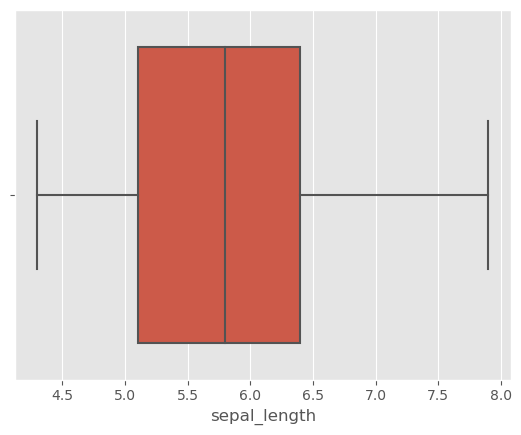

In [13]:
sns.boxplot(x = 'sepal_length', data = df)

<Axes: xlabel='sepal_width'>

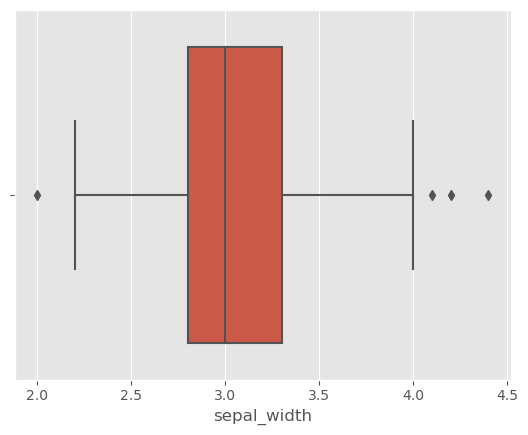

In [14]:
sns.boxplot(x = 'sepal_width', data = df)

<Axes: xlabel='petal_length'>

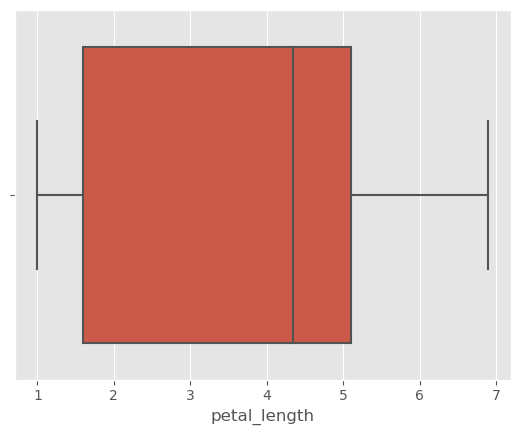

In [15]:
sns.boxplot(x = 'petal_length', data = df)

<Axes: xlabel='petal_width'>

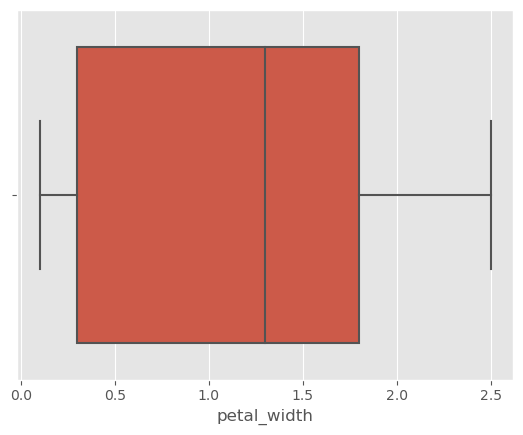

In [16]:
sns.boxplot(x = 'petal_width', data = df)

## Bivariate Analysis

<Axes: >

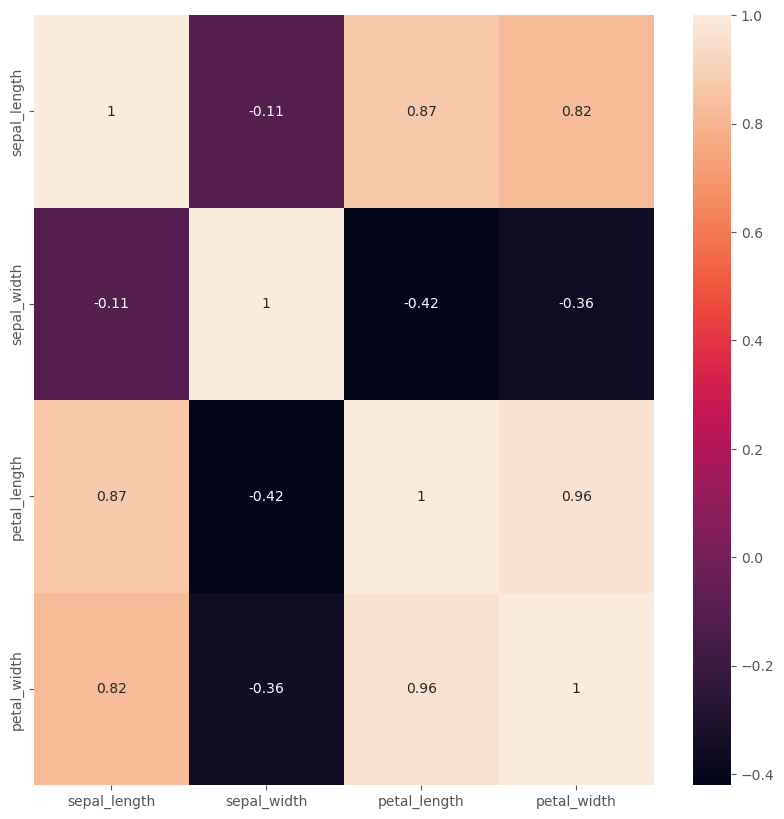

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

We can see that the following columns are correlated:

petal_width and petal_length: 0.96

petal_length and sepal_length: 0.87

petal_width and sepal_length: 0.82

## Preprocessing

## Handling Outliers 

In [18]:
df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
sepal_length,4.3,4.600,5.80,7.255,7.700,7.9
sepal_width,2.0,2.345,3.00,3.800,4.151,4.4
petal_length,1.0,1.300,4.35,6.100,6.700,6.9
petal_width,0.1,0.200,1.30,2.300,2.500,2.5


In [19]:
def outlier_thresholds(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis = None):
        return True
    else:
        return False

In [20]:
for col in df.select_dtypes(include=[float, int]):
    print(f"{col}: {check_outliers(df, col)}")

sepal_length: False
sepal_width: True
petal_length: False
petal_width: False


In [21]:
def grab_outliers(df, col_name, index = False):
    low, up = outlier_thresholds(df, col_name)
    if df[((df[col_name] < low) | (df[col_name] > up))].shape[0] > 10:
        print(df[((df[col_name] < low) |(df[col_name] > up))].head())
    else:
        print(df[((df[col_name] < low) | (df[col_name] > up))])
    if index:
        outlier_index = df[((df[col_name] < low) | (df[col_name] > up))].index
        return outlier_index

In [22]:
for col in df.select_dtypes(include=[float, int]):
    col, grab_outliers(df, col)

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [23]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [24]:
for col in df.select_dtypes(include=[float, int]):
    replace_with_thresholds(df,col)

In [25]:
#Checking Outliers Again
for col in df.select_dtypes(include=[float, int]):
    print(f"{col}: {check_outliers(df,col)}")

sepal_length: False
sepal_width: False
petal_length: False
petal_width: False


In [26]:
df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
sepal_length,4.30,4.600,5.80,7.255,7.70,7.90
sepal_width,2.05,2.345,3.00,3.800,4.05,4.05
petal_length,1.00,1.300,4.35,6.100,6.70,6.90
petal_width,0.10,0.200,1.30,2.300,2.50,2.50


## Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
df[['petal_length']] = ss.fit_transform(df[['petal_length']])
df[['petal_width']] = ss.fit_transform(df[['petal_width']])

## Feature Encoding 

In [29]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,-1.341272,-1.312977,0
1,4.9,3.0,-1.341272,-1.312977,0
2,4.7,3.2,-1.398138,-1.312977,0
3,4.6,3.1,-1.284407,-1.312977,0
4,5.0,3.6,-1.341272,-1.312977,0
...,...,...,...,...,...
145,6.7,3.0,0.819624,1.447956,2
146,6.3,2.5,0.705893,0.922064,2
147,6.5,3.0,0.819624,1.053537,2
148,6.2,3.4,0.933356,1.447956,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Train- Test Split 

In [32]:
X = df.drop(['species'], axis = 1)
y = df['species']

In [33]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,-1.341272,-1.312977
1,4.9,3.0,-1.341272,-1.312977
2,4.7,3.2,-1.398138,-1.312977
3,4.6,3.1,-1.284407,-1.312977
4,5.0,3.6,-1.341272,-1.312977


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building and Evaluating the Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as plt
import scikitplot as skplt

In [38]:
def predict(ml_model):
    print('model is: {}'.format(ml_model))
    model = ml_model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    train_precision = precision_score(y_train, model.predict(X_train), average='weighted')
# Testing precision score
    test_precision = precision_score(y_test, model.predict(X_test), average='weighted')
    print("Training Precision Score:", train_precision)
    print("Testing Precision Score:", test_precision)
    predictions=model.predict(X_test)
    print('predictions are: {}'.format(predictions))
# Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print('Confusion Matrix:\n', cm)
    print(classification_report(y_test, predictions))

In [39]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier(n_estimators=100, random_state=42))

model is: RandomForestClassifier(random_state=42)
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Precision Score: 1.0
Testing Precision Score: 1.0
predictions are: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

